In [96]:
import numpy as np
from pandas import *
from matplotlib.pyplot import *
from seaborn import *
import cufflinks as cf
from plotly.offline import *
init_notebook_mode(connected = True)
cf.go_offline()
%matplotlib inline

In [6]:
df = read_csv('heart_disease.csv',names = ['Age','Sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','Num'])

In [7]:
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [17]:
df.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Num         0
dtype: int64

In [8]:
x = df.iloc[:,:].values

In [27]:
x

array([[63, 1, 1, ..., '0', '6', 0],
       [67, 1, 4, ..., '3', '3', 2],
       [67, 1, 4, ..., '2', '7', 1],
       ...,
       [57, 1, 4, ..., '1', '7', 3],
       [57, 0, 2, ..., '1', '3', 1],
       [38, 1, 3, ..., '0', '3', 0]], dtype=object)

In [19]:
from sklearn.impute import SimpleImputer

In [24]:
sk = SimpleImputer(missing_values = '?',strategy = 'most_frequent')
x = sk.fit_transform(x)

In [25]:
from sklearn.cluster import KMeans

In [29]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss)

[1088984.4514851486, 605081.327138232, 473105.87253100704, 392574.28374934057, 333238.1618759036, 294155.2657602468, 269664.3474906087, 245581.98730322247, 227177.30338437587, 207739.88811080653]


In [30]:
wcss

[1088984.4514851486,
 605081.327138232,
 473105.87253100704,
 392574.28374934057,
 333238.1618759036,
 294155.2657602468,
 269664.3474906087,
 245581.98730322247,
 227177.30338437587,
 207739.88811080653]

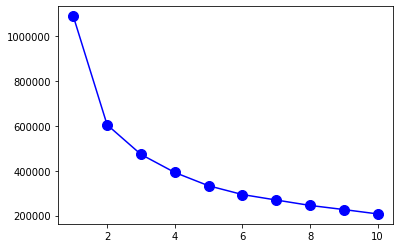

In [33]:
plot(range(1,11),wcss,color = 'blue',marker = 'o',markersize = 10)

In [34]:
m = KMeans(n_clusters = 2,init = 'k-means++',random_state = 42)
t = m.fit_predict(x)

In [35]:
t

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [36]:
df['Class'] = t 

In [37]:
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Num,Class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,0
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,0
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,0


In [38]:
df.replace('?','0',inplace = True)

In [39]:
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Num,Class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,0
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,0
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,0


In [80]:
df['Class'].value_counts()

0    192
1    111
Name: Class, dtype: int64

In [44]:
xc = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [54]:
xc_train

array([[-1.1318520842611726, 1, 4, ..., '1', '3', 1],
       [0.07286212937466989, 1, 4, ..., '1', '7', 4],
       [-0.03665734459222488, 1, 4, ..., '1', '7', 2],
       ...,
       [-2.1175273499632254, 0, 4, ..., '0', '3', 0],
       [-0.474735240459804, 1, 4, ..., '0', '7', 4],
       [0.510940025242249, 0, 4, ..., '0', '3', 1]], dtype=object)

In [51]:
xc[:,[0,3,4,7,9]]

array([[63, 145, 233, 150, 2.3],
       [67, 160, 286, 108, 1.5],
       [67, 120, 229, 129, 2.6],
       ...,
       [57, 130, 131, 115, 1.2],
       [57, 130, 236, 174, 0.0],
       [38, 138, 175, 173, 0.0]], dtype=object)

In [49]:
from sklearn.model_selection import train_test_split
xc_train,xc_test,y_train,y_test = train_test_split(xc,y,test_size = 0.2, random_state = 0)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xc_train[:,[0,3,4,7,9]] = sc.fit_transform(xc_train[:,[0,3,4,7,9]])
xc_test[:,[0,3,4,7,9]] = sc.transform(xc_test[:,[0,3,4,7,9]])

In [42]:
type(df['ca'][0])

str

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
cl = KNeighborsClassifier(n_neighbors = 5)
cl.fit(xc_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
y_pred = cl.predict(xc_test)

In [59]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[33  3]
 [ 9 16]]


0.8032786885245902

In [60]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf',random_state = 0)
svm.fit(xc_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [61]:
svm_pred = svm.predict(xc_test)

In [62]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,svm_pred)
print(cm)
accuracy_score(y_test,svm_pred)

[[35  1]
 [ 5 20]]


0.9016393442622951

In [82]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
tree.fit(xc_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [64]:
tree_pred = tree.predict(xc_test)

In [65]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,tree_pred)
print(cm)
accuracy_score(y_test,tree_pred)

[[36  0]
 [ 1 24]]


0.9836065573770492

In [66]:
from xgboost import XGBClassifier
boost = XGBClassifier()
boost.fit(xc_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
boost_pred = boost.predict(xc_test)

In [68]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,boost_pred)
print(cm)
accuracy_score(y_test,boost_pred)

[[36  0]
 [ 0 25]]


1.0

In [74]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(xc_train,y_train)

Learning rate set to 0.005621
0:	learn: 0.6819126	total: 64.5ms	remaining: 1m 4s
1:	learn: 0.6718954	total: 68.8ms	remaining: 34.3s
2:	learn: 0.6612677	total: 71.3ms	remaining: 23.7s
3:	learn: 0.6512102	total: 73.8ms	remaining: 18.4s
4:	learn: 0.6428511	total: 76.5ms	remaining: 15.2s
5:	learn: 0.6339570	total: 79.6ms	remaining: 13.2s
6:	learn: 0.6248524	total: 82ms	remaining: 11.6s
7:	learn: 0.6138005	total: 83.8ms	remaining: 10.4s
8:	learn: 0.6056807	total: 86.3ms	remaining: 9.5s
9:	learn: 0.5973356	total: 88.7ms	remaining: 8.79s
10:	learn: 0.5903820	total: 91.7ms	remaining: 8.24s
11:	learn: 0.5824601	total: 94.1ms	remaining: 7.74s
12:	learn: 0.5741495	total: 96.4ms	remaining: 7.32s
13:	learn: 0.5661550	total: 98.9ms	remaining: 6.96s
14:	learn: 0.5584195	total: 101ms	remaining: 6.64s
15:	learn: 0.5521532	total: 104ms	remaining: 6.42s
16:	learn: 0.5442155	total: 107ms	remaining: 6.18s
17:	learn: 0.5383467	total: 109ms	remaining: 5.93s
18:	learn: 0.5313270	total: 111ms	remaining: 5.74s


208:	learn: 0.0736232	total: 466ms	remaining: 1.76s
209:	learn: 0.0732420	total: 469ms	remaining: 1.76s
210:	learn: 0.0727029	total: 472ms	remaining: 1.77s
211:	learn: 0.0723273	total: 476ms	remaining: 1.77s
212:	learn: 0.0718390	total: 479ms	remaining: 1.77s
213:	learn: 0.0713650	total: 481ms	remaining: 1.77s
214:	learn: 0.0706143	total: 484ms	remaining: 1.76s
215:	learn: 0.0698971	total: 486ms	remaining: 1.76s
216:	learn: 0.0694745	total: 489ms	remaining: 1.76s
217:	learn: 0.0691529	total: 492ms	remaining: 1.76s
218:	learn: 0.0685079	total: 495ms	remaining: 1.76s
219:	learn: 0.0679175	total: 497ms	remaining: 1.76s
220:	learn: 0.0674275	total: 500ms	remaining: 1.76s
221:	learn: 0.0670689	total: 502ms	remaining: 1.76s
222:	learn: 0.0666168	total: 504ms	remaining: 1.76s
223:	learn: 0.0663250	total: 507ms	remaining: 1.75s
224:	learn: 0.0657997	total: 509ms	remaining: 1.75s
225:	learn: 0.0653147	total: 512ms	remaining: 1.75s
226:	learn: 0.0650015	total: 515ms	remaining: 1.75s
227:	learn: 

385:	learn: 0.0264505	total: 934ms	remaining: 1.49s
386:	learn: 0.0263609	total: 937ms	remaining: 1.48s
387:	learn: 0.0262711	total: 940ms	remaining: 1.48s
388:	learn: 0.0261320	total: 943ms	remaining: 1.48s
389:	learn: 0.0260000	total: 947ms	remaining: 1.48s
390:	learn: 0.0259001	total: 950ms	remaining: 1.48s
391:	learn: 0.0257916	total: 953ms	remaining: 1.48s
392:	learn: 0.0256616	total: 956ms	remaining: 1.48s
393:	learn: 0.0255397	total: 959ms	remaining: 1.47s
394:	learn: 0.0254135	total: 961ms	remaining: 1.47s
395:	learn: 0.0253423	total: 964ms	remaining: 1.47s
396:	learn: 0.0252505	total: 966ms	remaining: 1.47s
397:	learn: 0.0251002	total: 969ms	remaining: 1.47s
398:	learn: 0.0249578	total: 972ms	remaining: 1.46s
399:	learn: 0.0248805	total: 974ms	remaining: 1.46s
400:	learn: 0.0247778	total: 977ms	remaining: 1.46s
401:	learn: 0.0246579	total: 980ms	remaining: 1.46s
402:	learn: 0.0245402	total: 982ms	remaining: 1.46s
403:	learn: 0.0243816	total: 984ms	remaining: 1.45s
404:	learn: 

576:	learn: 0.0133827	total: 1.4s	remaining: 1.03s
577:	learn: 0.0133500	total: 1.41s	remaining: 1.03s
578:	learn: 0.0133140	total: 1.41s	remaining: 1.02s
579:	learn: 0.0132770	total: 1.41s	remaining: 1.02s
580:	learn: 0.0132357	total: 1.41s	remaining: 1.02s
581:	learn: 0.0131878	total: 1.42s	remaining: 1.02s
582:	learn: 0.0131531	total: 1.42s	remaining: 1.01s
583:	learn: 0.0131229	total: 1.42s	remaining: 1.01s
584:	learn: 0.0130859	total: 1.42s	remaining: 1.01s
585:	learn: 0.0130528	total: 1.43s	remaining: 1.01s
586:	learn: 0.0130172	total: 1.43s	remaining: 1s
587:	learn: 0.0129796	total: 1.43s	remaining: 1s
588:	learn: 0.0129526	total: 1.43s	remaining: 1s
589:	learn: 0.0129007	total: 1.44s	remaining: 998ms
590:	learn: 0.0128465	total: 1.44s	remaining: 996ms
591:	learn: 0.0127885	total: 1.44s	remaining: 993ms
592:	learn: 0.0127591	total: 1.44s	remaining: 991ms
593:	learn: 0.0127242	total: 1.45s	remaining: 989ms
594:	learn: 0.0126817	total: 1.45s	remaining: 986ms
595:	learn: 0.0126220	

768:	learn: 0.0082437	total: 1.86s	remaining: 559ms
769:	learn: 0.0082299	total: 1.86s	remaining: 557ms
770:	learn: 0.0082180	total: 1.87s	remaining: 555ms
771:	learn: 0.0082044	total: 1.87s	remaining: 552ms
772:	learn: 0.0081882	total: 1.87s	remaining: 550ms
773:	learn: 0.0081737	total: 1.88s	remaining: 548ms
774:	learn: 0.0081559	total: 1.88s	remaining: 545ms
775:	learn: 0.0081354	total: 1.88s	remaining: 543ms
776:	learn: 0.0081057	total: 1.88s	remaining: 540ms
777:	learn: 0.0080910	total: 1.88s	remaining: 538ms
778:	learn: 0.0080753	total: 1.89s	remaining: 535ms
779:	learn: 0.0080609	total: 1.89s	remaining: 533ms
780:	learn: 0.0080346	total: 1.89s	remaining: 530ms
781:	learn: 0.0080199	total: 1.89s	remaining: 528ms
782:	learn: 0.0080026	total: 1.9s	remaining: 525ms
783:	learn: 0.0079892	total: 1.9s	remaining: 523ms
784:	learn: 0.0079708	total: 1.9s	remaining: 520ms
785:	learn: 0.0079577	total: 1.9s	remaining: 518ms
786:	learn: 0.0079386	total: 1.9s	remaining: 515ms
787:	learn: 0.007

978:	learn: 0.0055345	total: 2.33s	remaining: 49.9ms
979:	learn: 0.0055282	total: 2.33s	remaining: 47.5ms
980:	learn: 0.0055225	total: 2.33s	remaining: 45.1ms
981:	learn: 0.0055154	total: 2.33s	remaining: 42.8ms
982:	learn: 0.0055087	total: 2.33s	remaining: 40.4ms
983:	learn: 0.0055038	total: 2.34s	remaining: 38ms
984:	learn: 0.0054953	total: 2.34s	remaining: 35.6ms
985:	learn: 0.0054876	total: 2.34s	remaining: 33.3ms
986:	learn: 0.0054753	total: 2.35s	remaining: 30.9ms
987:	learn: 0.0054695	total: 2.35s	remaining: 28.5ms
988:	learn: 0.0054560	total: 2.35s	remaining: 26.2ms
989:	learn: 0.0054451	total: 2.35s	remaining: 23.8ms
990:	learn: 0.0054377	total: 2.36s	remaining: 21.4ms
991:	learn: 0.0054286	total: 2.36s	remaining: 19ms
992:	learn: 0.0054207	total: 2.36s	remaining: 16.6ms
993:	learn: 0.0054118	total: 2.36s	remaining: 14.3ms
994:	learn: 0.0054043	total: 2.37s	remaining: 11.9ms
995:	learn: 0.0053944	total: 2.37s	remaining: 9.51ms
996:	learn: 0.0053870	total: 2.37s	remaining: 7.13

In [75]:
cat_pred = cat.predict(xc_test)

In [76]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,cat_pred)
print(cm)
accuracy_score(y_test,cat_pred)

[[36  0]
 [ 0 25]]


1.0

In [83]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = tree,X = xc_train , y = y_train , cv = 10)
DT = accuracies.mean()*100
print('Accuracy : {:0.2f}%'.format(accuracies.mean()*100))

Accuracy : 98.37%


In [84]:
DT

98.36666666666666

In [110]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator = svm,X = xc_train , y = y_train , cv = 10)
sv = acc.mean()*100
print('Accuracy : {:0.2f}%'.format(acc.mean()*100))

Accuracy : 92.13%


In [111]:
from sklearn.model_selection import cross_val_score
ac = cross_val_score(estimator = cl,X = xc_train , y = y_train , cv = 10)
KNN = ac.mean()*100
print('Accuracy : {:0.2f}%'.format(ac.mean()*100))

Accuracy : 81.38%


In [112]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(estimator = boost,X = xc_train , y = y_train , cv = 10)
XG = a.mean()*100
print('Accuracy : {:0.2f}%'.format(a.mean()*100))

Accuracy : 97.95%


In [91]:
d = DataFrame(i)

In [98]:
d = DataFrame({'Model':['svm','DecisionTree','KNN','XGBoost'],'accuracies':[sv,DT,KNN,XG]})

In [99]:
d

,Model,accuracies
0,svm,92.133333
1,DecisionTree,98.366667
2,KNN,81.383333
3,XGBoost,97.950000


In [109]:
d.iplot(kind = 'bar',x = 'Model',y = 'accuracies',title = 'Model Results and Comparision',xTitle = 'Model',yTitle = ' Accuracy',colors =('red','green','yellow','blue') )

